# CRISP-DM for Customer Churn Analysis

## 1. Business Understanding

**Objective**: Understand the business objectives and requirements from a business perspective.

### Steps:
- **Determine Business Objectives**: Identify the primary goals and needs of the business.
- **Assess the Situation**: Gather important information about available resources, constraints, risks, and success factors.
  - Example: Review current customer retention strategies, available data, and tools.
- **Define Data Mining Goals**: Translate business goals into specific data mining objectives.
  - Example: Identify key factors contributing to customer churn and develop a predictive model.
- **Produce Project Plan**: Outline a preliminary plan to achieve the objectives.
  - Example: Timeline, key milestones, and roles and responsibilities.

understand what leads to customer churn in the company

In [1642]:
#importing

import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from sklearn.utils import resample
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
from xgboost import XGBClassifier
import sklearn.feature_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import metrics
from pickle import dump
import os
import warnings


warnings.filterwarnings(action='ignore')

In [1643]:
df = pd.read_csv('../data/telecom_churn.csv')

## 2. Data Understanding

**Objective**: Collect initial data and familiarize with the data, identifying data quality issues and gaining preliminary insights.

### Steps:
- **Collect Initial Data**: Obtain relevant data needed for the project from Kaggle.
  - **Dataset**: [Telecom Churn Dataset](https://www.kaggle.com/datasets/barun2104/telecom-churn)
- **Describe Data**: Examine data properties such as format, volume, and structure.
  - Example: Data schema, types of variables, number of records.
- **Explore Data**: Perform initial analysis to detect patterns, anomalies, and understand data distribution.
  - Example: Correlation analysis, summary statistics, visualizations.
- **Verify Data Quality**: Assess and address data quality issues like missing or inconsistent values.
  - Example: Missing value treatment, outlier detection.

In [1645]:
df.shape

(3333, 11)

In [1646]:

'''
churn: 0 = False, 1 = True
Data plan: 0 = False, 1 = True
Contract Renewal: 0 = False, 1 = True
'''
df.tail(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [1647]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [1648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


visualize uniques values

In [1650]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

visualize missing data

In [1652]:
df.isna().sum()
# 0 missing data

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### graphs

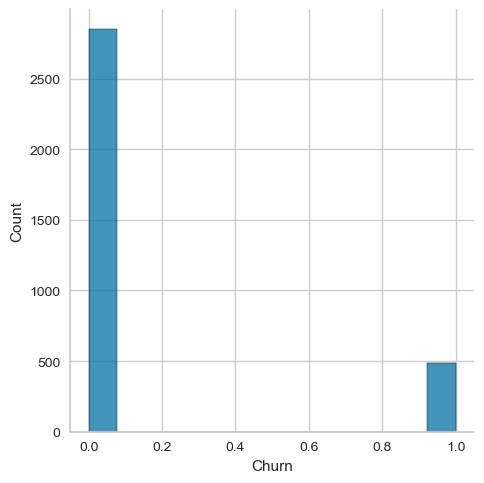

In [1654]:
sns.displot(df['Churn']);

<Axes: >

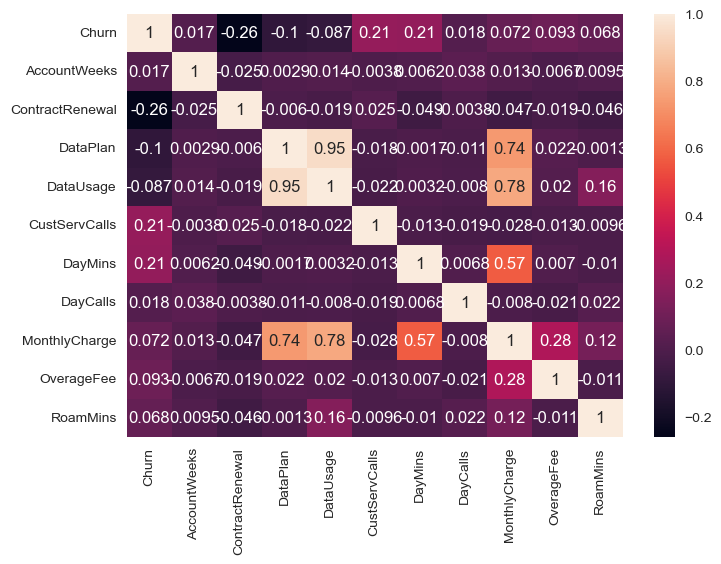

In [1655]:
corr = df.corr()
sns.heatmap(corr, annot=True)

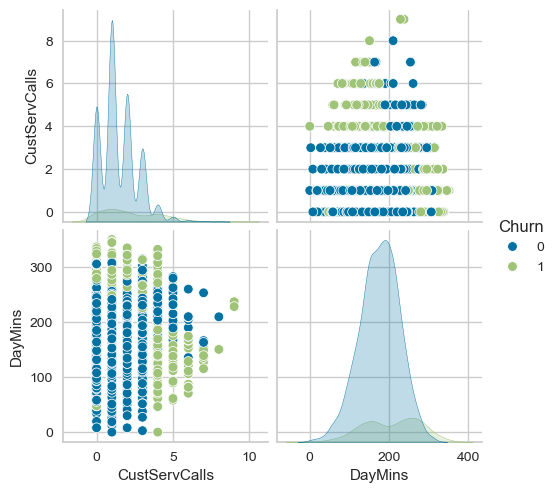

In [1656]:
sns.pairplot(df[['Churn','CustServCalls','DayMins']], hue='Churn');

<Axes: xlabel='DataUsage', ylabel='Count'>

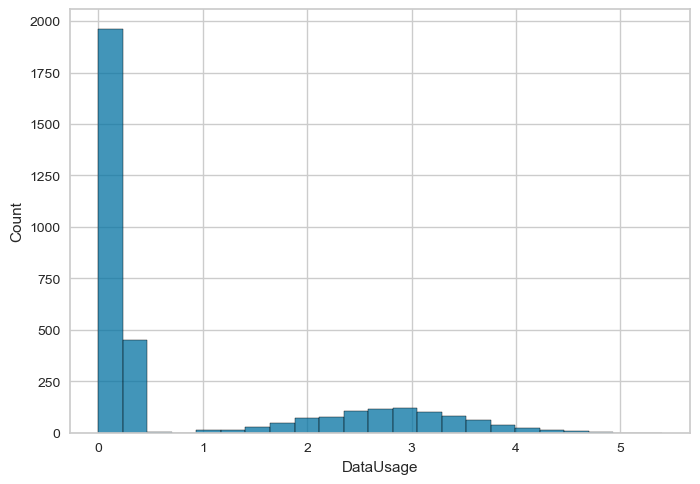

In [1657]:
sns.histplot(df['DataUsage'])

<Axes: xlabel='CustServCalls', ylabel='Count'>

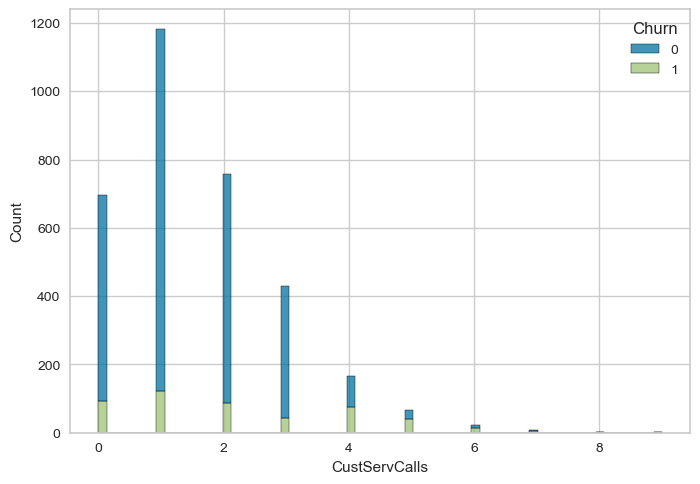

In [1658]:
sns.histplot(data=df, x=df['CustServCalls'], hue='Churn',multiple='stack')

<Axes: xlabel='DayMins', ylabel='Count'>

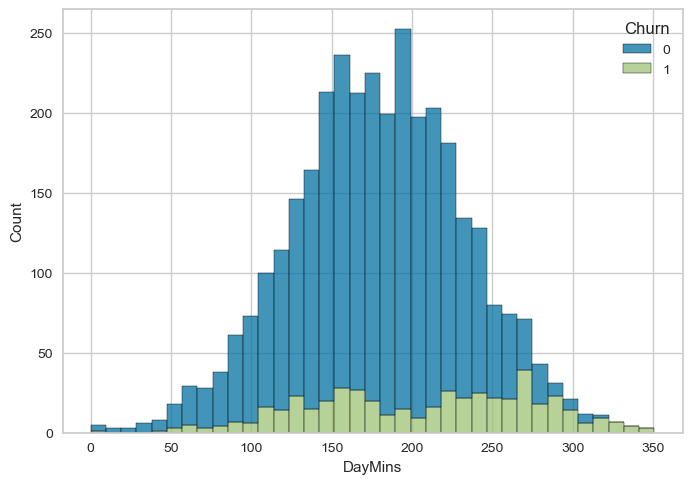

In [1659]:
sns.histplot(data=df, x=df['DayMins'], hue='Churn',multiple='stack')


daymins >380~ = high porb of churn

<Axes: xlabel='AccountWeeks', ylabel='Count'>

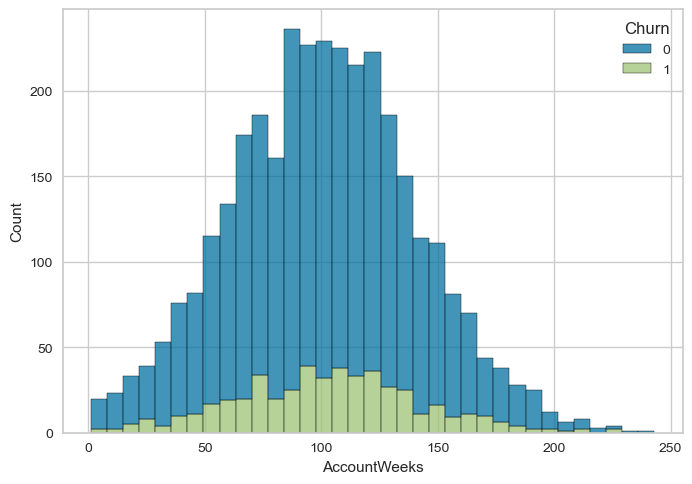

In [1661]:
sns.histplot(x=df['AccountWeeks'], hue=df['Churn'], multiple='stack')

In [1662]:
df['AccountWeeks']

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: AccountWeeks, Length: 3333, dtype: int64

<Axes: xlabel='DataPlan', ylabel='Count'>

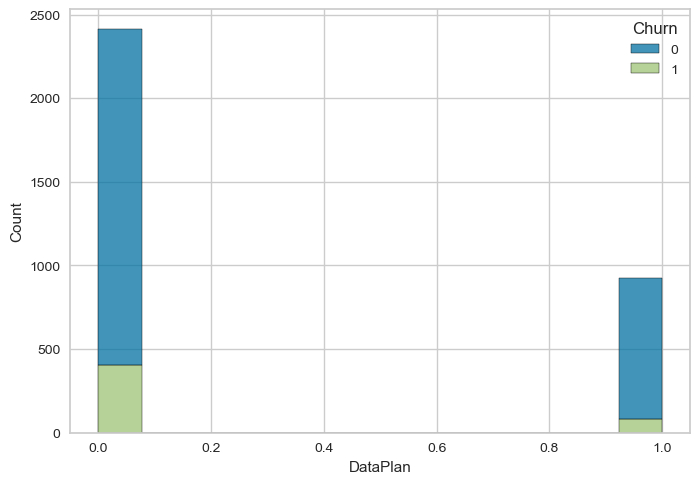

In [1663]:
sns.histplot(data=df, x=df['DataPlan'], hue='Churn',multiple='stack')

<Axes: xlabel='DayMins', ylabel='DayCalls'>

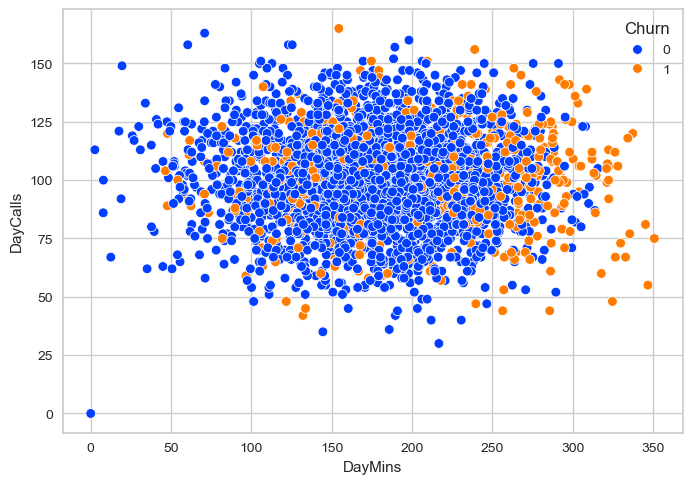

In [1664]:
sns.scatterplot(data=df,x='DayMins',y='DayCalls', hue='Churn', zorder=2,palette='bright')

## 3. Data Preparation

**Objective**: Prepare the final dataset that will be used for modeling.

### Steps:
- **Select Data**: Choose relevant data for the project.
  - Example: Select data for customers active in the last two years.
- **Clean Data**: Correct or remove erroneous data and handle missing values.
  - Example: Remove duplicates, impute missing values.
- **Construct Data**: Create derived or aggregated variables that may be useful for analysis.
  - Example: Create variables such as frequency of support calls.
- **Integrate Data**: Combine data from different sources if necessary.
  - Example: Merge customer demographic data with usage data.
- **Format Data**: Structure the data in a format suitable for modeling tools.
  - Example: Normalize variables, create training and test datasets.

In [1666]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [1667]:
len(df.loc[df['Churn'] == 0].index)

2850

In [1668]:
 df['Churn'].value_counts()[0]-df['Churn'].value_counts()[1]

2367

## feature engineering
<l> New feature: FrequentCallerToSupport, when the custservcall has bigger frequency than 3 call

In [1670]:
df['FrequentCallerToSupport'] = (df['CustServCalls'] > 3).astype(int)

<Axes: xlabel='FrequentCallerToSupport', ylabel='Count'>

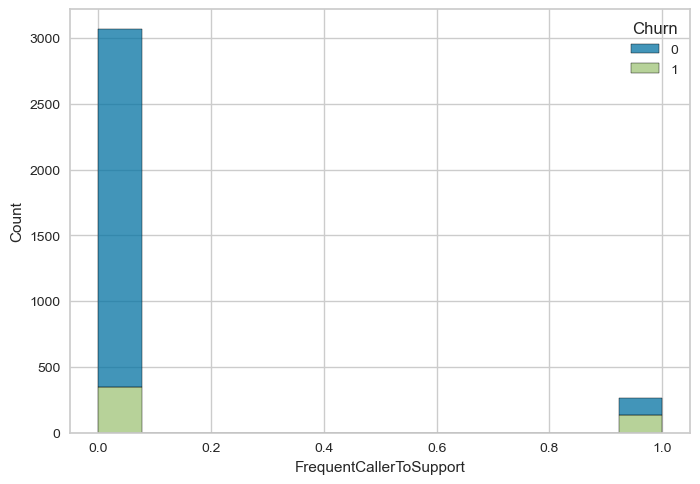

In [1671]:
sns.histplot(x=df['FrequentCallerToSupport'], hue=df['Churn'], multiple='stack')

## balancing classes by removing data

In [1673]:
original_df = df

In [1674]:
n_rows_drop = df['Churn'].value_counts()[0]-df['Churn'].value_counts()[1]-1
print(n_rows_drop)

drop_idx = np.random.choice(df.loc[df['Churn'] == 0].index, n_rows_drop, replace=False)
df = df.drop(drop_idx)

2366


In [1675]:
df['Churn'].value_counts()

Churn
0    484
1    483
Name: count, dtype: int64

In [1676]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'FrequentCallerToSupport'],
      dtype='object')

In [1677]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5,0
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7,0
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
19,0,73,1,0,0.00,1,224.4,90,52.0,7.98,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3317,0,163,0,0,0.00,1,197.2,90,50.0,9.43,7.8,0
3320,1,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7,1
3322,1,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5,1
3323,1,117,1,0,0.39,5,118.4,126,45.9,12.47,13.6,1


In [1678]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [1679]:
y.head()

6     0
8     0
10    1
15    1
19    0
Name: Churn, dtype: int64

In [1680]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
6,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5,0
8,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7,0
10,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
15,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
19,73,1,0,0.00,1,224.4,90,52.0,7.98,13.0,0


In [1681]:
# X = SelectKBest(f_classif, k=1).fit_transform(X, y)
# selectin best feature with Kbest get worst results

#### 4. Modeling
- **Techniques**: Random Forest, Logistic Regression etc.
- **Testing**: Train-test split, cross-validation.
- **Model Building**: Train models, optimize parameters.
- **Model Evaluation**: Assess performance with accuracy, precision, recall, F1-score.


In [1683]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [1684]:
X_train.shape,X_test.shape

((483, 11), (484, 11))

# Testing multiples models  with sklearn

In [1686]:
if True:
    models = []
    
    models.append(("LogisticRegression",LogisticRegression()))
    models.append(("SVC",SVC()))
    models.append(("LinearSVC",LinearSVC()))
    models.append(("KNeighbors",KNeighborsClassifier()))
    models.append(("DecisionTree",DecisionTreeClassifier()))
    models.append(("RandomForest",RandomForestClassifier()))
    rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                    max_depth=10, random_state=0, max_features=None)
    models.append(("RandomForest2",rf2))
    models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))
    models.append(('XGboost', XGBClassifier()))
    
    
    results = []
    names = []
    for name,model in models:
        result = cross_val_score(model, X_train, y_train,  cv=3, scoring='f1_macro')
        names.append(name)
        results.append(result)
    
    for i in range(len(names)):
        print(names[i],results[i].mean())

LogisticRegression 0.7904977832607759
SVC 0.6382187108362851
LinearSVC 0.5869608841945616
KNeighbors 0.6339356353251399
DecisionTree 0.7608330165465897
RandomForest 0.8463190864969127
RandomForest2 0.8276135907682924
MLPClassifier 0.6726024122214036
XGboost 0.8112727828955899


* best model = random forest

In [1688]:
#Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [1689]:
pred = rf.predict(X_test)

In [1690]:
class_report = classification_report(y_test, pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       240
           1       0.90      0.82      0.86       244

    accuracy                           0.86       484
   macro avg       0.86      0.86      0.86       484
weighted avg       0.86      0.86      0.86       484



In [1691]:
if True:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    # Config GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')
    
    # fit model
    grid_search.fit(X_train, y_train)
    
    # pick up the best param
    best_params = grid_search.best_params_
    print(f'Best params: {best_params}')
    
    # score
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'F1 Score: {f1}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best params: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
F1 Score: 0.8697674418604651


Training with best params

In [1693]:
rf = RandomForestClassifier(**best_params,random_state=42)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
class_report = classification_report(y_test, pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       240
           1       0.90      0.85      0.88       244

    accuracy                           0.88       484
   macro avg       0.88      0.88      0.88       484
weighted avg       0.88      0.88      0.88       484



### Testing each param

### Trees

In [1696]:
# Lista de números de árvores
trees = [1, 10, 50, 100, 150, 200, 250, 500]

# Armazena os resultados
train_results_acc = []
test_results_acc = []
train_results_f1 = []
test_results_f1 = []

# Loop para testar diferentes números de árvores
for arvore in trees:
    print(arvore, "", end="")

    # Inicializa o RandomForestClassifier
    rf_2 = RandomForestClassifier(bootstrap=True,
                                  criterion='gini', 
                                  n_estimators=arvore, 
                                  n_jobs=5, 
                                  oob_score=True, 
                                  random_state=42)

    # Treina o modelo
    rf_2.fit(X_train, y_train)

    # Predição no conjunto de treino
    train_pred = rf_2.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    f1_train = f1_score(y_train, train_pred, average='weighted')  # F1 ponderado
    train_results_acc.append(acc_train)
    train_results_f1.append(f1_train)

    # Predição no conjunto de teste
    y_pred = rf_2.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')  # F1 ponderado
    test_results_acc.append(acc_test)
    test_results_f1.append(f1_test)

1 10 50 100 150 200 250 500 

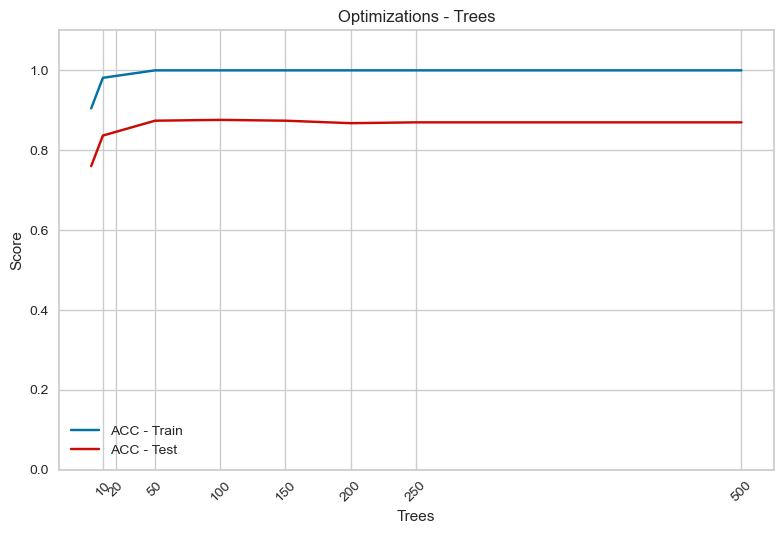

In [1697]:
# Plot Accuracy
line1, = plt.plot(trees, train_results_acc, 'b', label='ACC - Train')
line2, = plt.plot(trees, test_results_acc, 'r', label='ACC - Test')



plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = [10, 20, 50, 100, 150, 200, 250, 500] 
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('Trees')
plt.ylabel('Score')
plt.title('Optimizations - Trees')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### 50 TREES for best acc

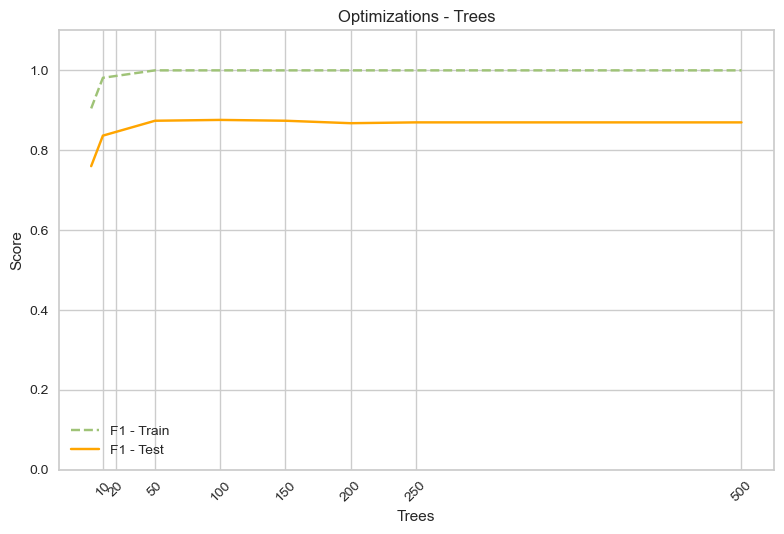

In [1699]:
# Plot F1-Score
line3, = plt.plot(trees, train_results_f1, 'g--', label='F1 - Train')
line4, = plt.plot(trees, test_results_f1, 'orange', label='F1 - Test')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = [10, 20, 50, 100, 150, 200, 250, 500] 
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('Trees')
plt.ylabel('Score')
plt.title('Optimizations - Trees')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### max_depths

In [1701]:
# Lista de números de árvores
max_depths = np.linspace(1,20,20, endpoint=True)

# Armazena os resultados
train_results_acc = []
test_results_acc = []
train_results_f1 = []
test_results_f1 = []

# Loop para testar diferentes números de árvores
for max_depth in max_depths:
    print(max_depth, "", end="")

    # Inicializa o RandomForestClassifier
    rf_2 = RandomForestClassifier(bootstrap=True,
                                  max_depth = int(max_depth),
                                  criterion='gini',  
                                  n_jobs=5, 
                                  oob_score=True, 
                                  random_state=42)

    # Treina o modelo
    rf_2.fit(X_train, y_train)

    # Predição no conjunto de treino
    train_pred = rf_2.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    f1_train = f1_score(y_train, train_pred, average='weighted')  # F1 ponderado
    train_results_acc.append(acc_train)
    train_results_f1.append(f1_train)

    # Predição no conjunto de teste
    y_pred = rf_2.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')  # F1 ponderado
    test_results_acc.append(acc_test)
    test_results_f1.append(f1_test)

1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 

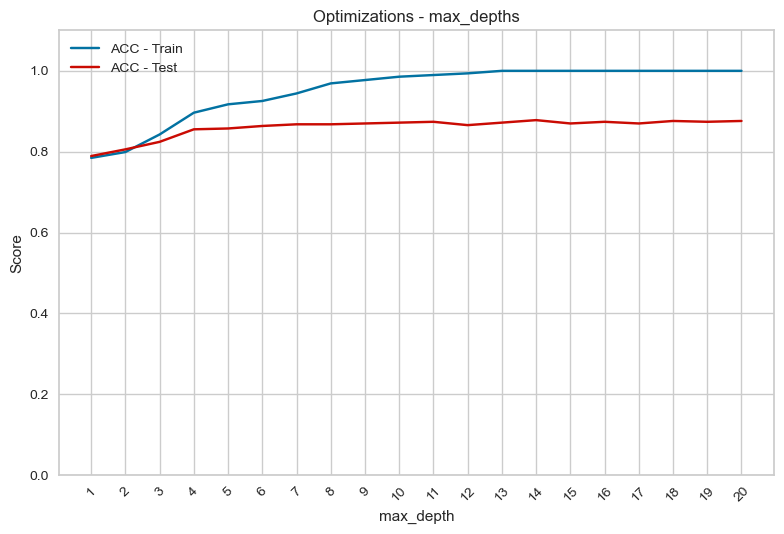

In [1702]:
# Plot Accuracy
line1, = plt.plot(max_depths, train_results_acc, 'b', label='ACC - Train')
line2, = plt.plot(max_depths, test_results_acc, 'r', label='ACC - Test')



plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(1,20,20, endpoint=True)
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Optimizations - max_depths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### 3 MAX_DEPTH for best acc

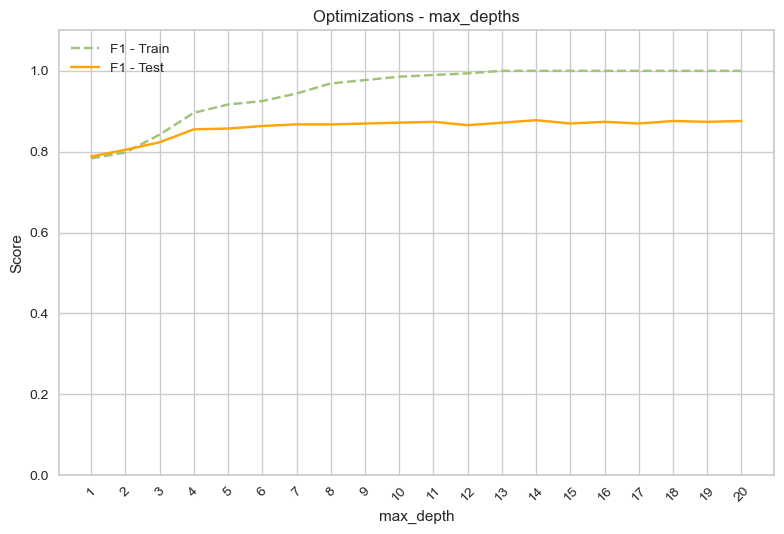

In [1704]:
# Plot F1-Score
line3, = plt.plot(max_depths, train_results_f1, 'g--', label='F1 - Train')
line4, = plt.plot(max_depths, test_results_f1, 'orange', label='F1 - Test')

plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(1,20,20, endpoint=True) 
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Optimizations - max_depths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### min_samples_leafs

In [1706]:
# Lista de números de árvores
min_samples_leafs = np.linspace(0.1,0.5,25, endpoint=True)

# Armazena os resultados
train_results_acc = []
test_results_acc = []
train_results_f1 = []
test_results_f1 = []

# Loop para testar diferentes números de árvores
for min_samples_leaf in min_samples_leafs:
    print(min_samples_leaf, "", end="")

    # Inicializa o RandomForestClassifier
    rf_2 = RandomForestClassifier(bootstrap=True,
                                  min_samples_leaf = min_samples_leaf,
                                  criterion='gini',  
                                  n_jobs=5, 
                                  oob_score=True, 
                                  random_state=42)

    # Treina o modelo
    rf_2.fit(X_train, y_train)

    # Predição no conjunto de treino
    train_pred = rf_2.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    f1_train = f1_score(y_train, train_pred)  # F1 ponderado
    train_results_acc.append(acc_train)
    train_results_f1.append(f1_train)

    # Predição no conjunto de teste
    y_pred = rf_2.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)  # F1 ponderado
    test_results_acc.append(acc_test)
    test_results_f1.append(f1_test)

0.1 0.11666666666666667 0.13333333333333333 0.15000000000000002 0.16666666666666669 0.18333333333333335 0.2 0.21666666666666667 0.23333333333333334 0.25 0.26666666666666666 0.2833333333333333 0.30000000000000004 0.31666666666666665 0.33333333333333337 0.35 0.3666666666666667 0.3833333333333333 0.4 0.41666666666666663 0.43333333333333335 0.44999999999999996 0.4666666666666667 0.4833333333333333 0.5 

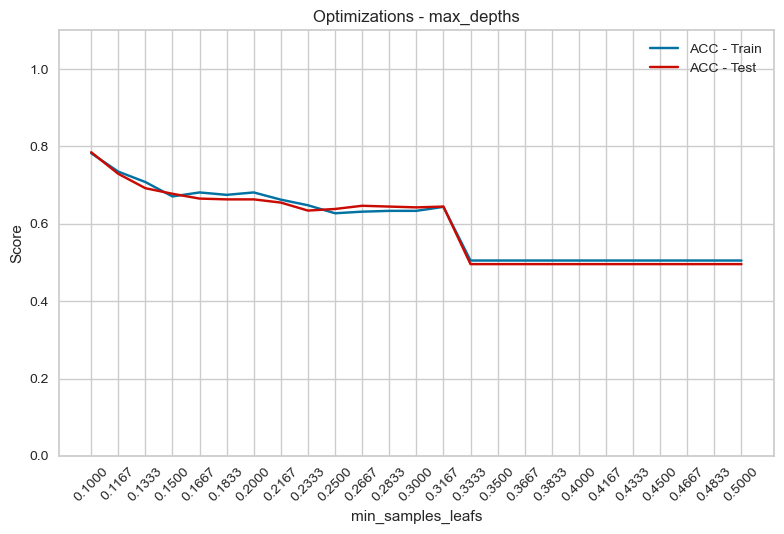

In [1707]:
# Plot Accuracy
line1, = plt.plot(min_samples_leafs, train_results_acc, 'b', label='ACC - Train')
line2, = plt.plot(min_samples_leafs, test_results_acc, 'r', label='ACC - Test')



plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(0.1,0.5,25, endpoint=True)
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('min_samples_leafs')
plt.ylabel('Score')
plt.title('Optimizations - max_depths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### 0.100 min_samples_leaf for best acc

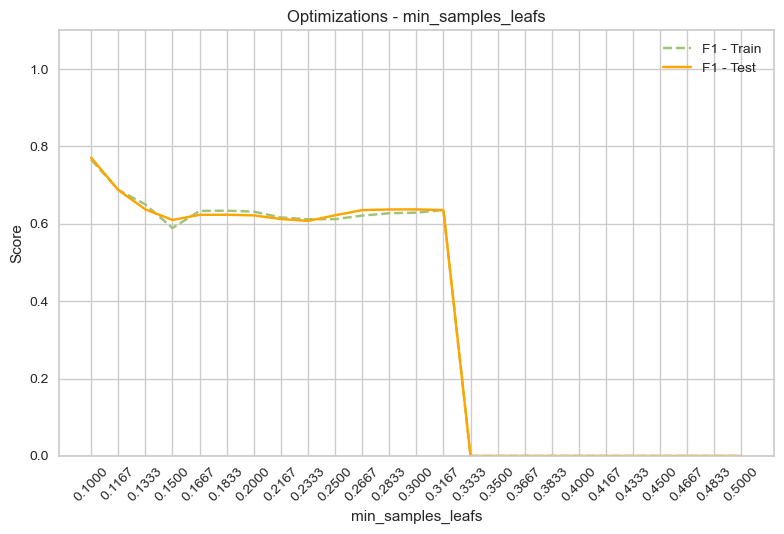

In [1709]:
# Plot F1-Score
line3, = plt.plot(min_samples_leafs, train_results_f1, 'g--', label='F1 - Train')
line4, = plt.plot(min_samples_leafs, test_results_f1, 'orange', label='F1 - Test')

plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(0.1,0.5,25, endpoint=True)
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('min_samples_leafs')
plt.ylabel('Score')
plt.title('Optimizations - min_samples_leafs')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### min_sample_split

In [1711]:
# Lista de números de árvores
min_sample_splits = np.linspace(0.1,0.5,25, endpoint=True)

# Armazena os resultados
train_results_acc = []
test_results_acc = []
train_results_f1 = []
test_results_f1 = []

# Loop para testar diferentes números de árvores
for min_sample_split in min_sample_splits:
    print(min_sample_split, "", end="")

    # Inicializa o RandomForestClassifier
    rf_2 = RandomForestClassifier(bootstrap=True,
                                  criterion='gini', 
                                  min_samples_split = min_sample_split,
                                  n_jobs=5, 
                                  oob_score=True, 
                                  random_state=42)

    # Treina o modelo
    rf_2.fit(X_train, y_train)

    # Predição no conjunto de treino
    train_pred = rf_2.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    f1_train = f1_score(y_train, train_pred, average='weighted')  # F1 ponderado
    train_results_acc.append(acc_train)
    train_results_f1.append(f1_train)

    # Predição no conjunto de teste
    y_pred = rf_2.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')  # F1 ponderado
    test_results_acc.append(acc_test)
    test_results_f1.append(f1_test)

0.1 0.11666666666666667 0.13333333333333333 0.15000000000000002 0.16666666666666669 0.18333333333333335 0.2 0.21666666666666667 0.23333333333333334 0.25 0.26666666666666666 0.2833333333333333 0.30000000000000004 0.31666666666666665 0.33333333333333337 0.35 0.3666666666666667 0.3833333333333333 0.4 0.41666666666666663 0.43333333333333335 0.44999999999999996 0.4666666666666667 0.4833333333333333 0.5 

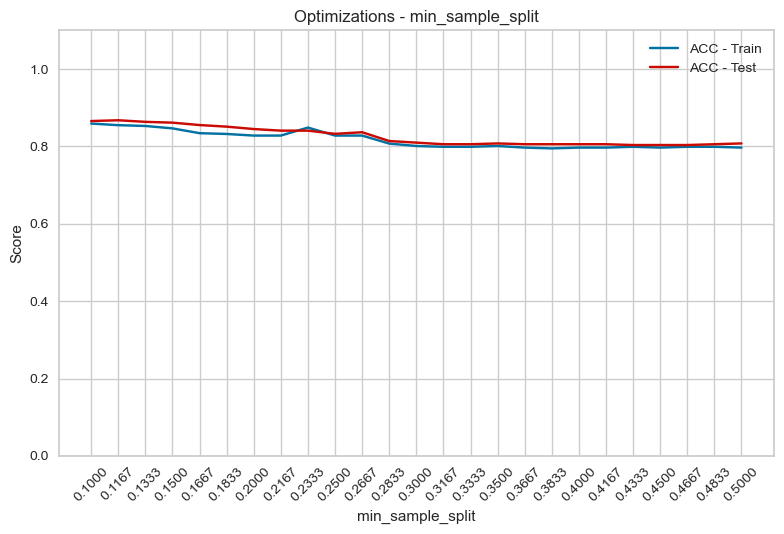

In [1712]:
# Plot Accuracy
line1, = plt.plot(min_sample_splits, train_results_acc, 'b', label='ACC - Train')
line2, = plt.plot(min_sample_splits, test_results_acc, 'r', label='ACC - Test')



plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(0.1,0.5,25, endpoint=True)
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('min_sample_split')
plt.ylabel('Score')
plt.title('Optimizations - min_sample_split')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### 0.100 min_samples_split for best acc

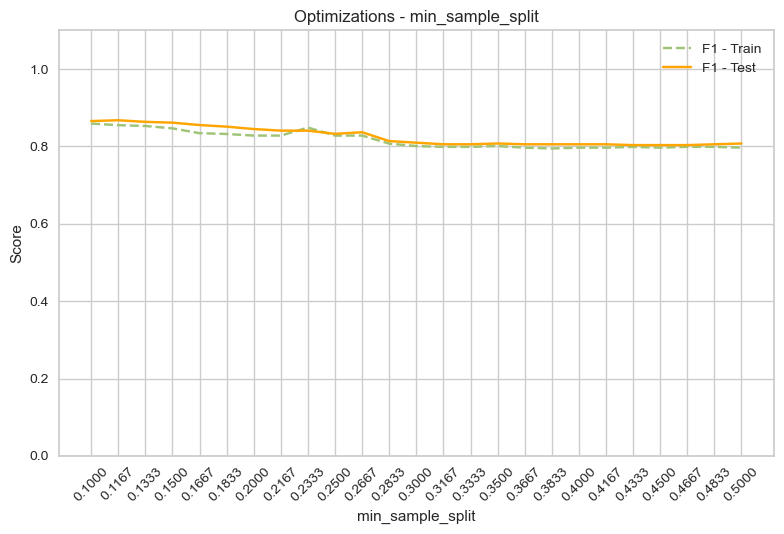

In [1714]:
line3, = plt.plot(min_sample_splits, train_results_f1, 'g--', label='F1 - Train')
line4, = plt.plot(min_sample_splits, test_results_f1, 'orange', label='F1 - Test')



plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})

x_ticks = np.linspace(0.1,0.5,25, endpoint=True)
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('min_sample_split')
plt.ylabel('Score')
plt.title('Optimizations - min_sample_split')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [1715]:
max_features = list(range(1,X_train.shape[1]))

train_results_acc = []
test_results_acc = []
train_results_f1 = []
test_results_f1 = []

for max_feature in max_features:
    print(max_feature, "", end="")

    rf_2 = RandomForestClassifier(bootstrap=True,
                                  criterion='gini',
                                  max_features=max_feature,
                                  n_jobs=5,
                                  oob_score=True,
                                  random_state=42)

    rf_2.fit(X_train, y_train)

    train_pred = rf_2.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    f1_train = f1_score(y_train, train_pred, average='weighted')
    train_results_acc.append(acc_train)
    train_results_f1.append(f1_train)

    y_pred = rf_2.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred, average='weighted')
    test_results_acc.append(acc_test)
    test_results_f1.append(f1_test)

1 2 3 4 5 6 7 8 9 10 

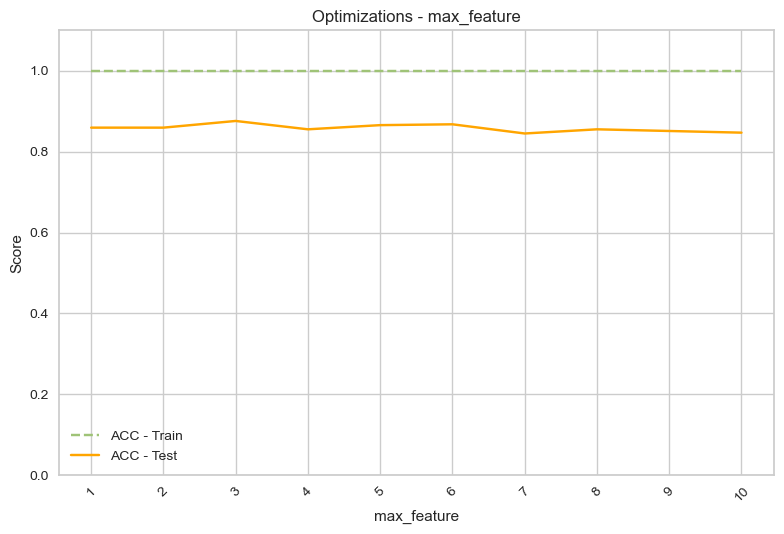

In [1716]:
line1, = plt.plot(max_features, train_results_acc, 'g--', label='ACC - Train')
line2, = plt.plot(max_features, test_results_acc, 'orange', label='ACC - Test')



plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

x_ticks = list(range(1,X_train.shape[1]))
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('max_feature')
plt.ylabel('Score')
plt.title('Optimizations - max_feature')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

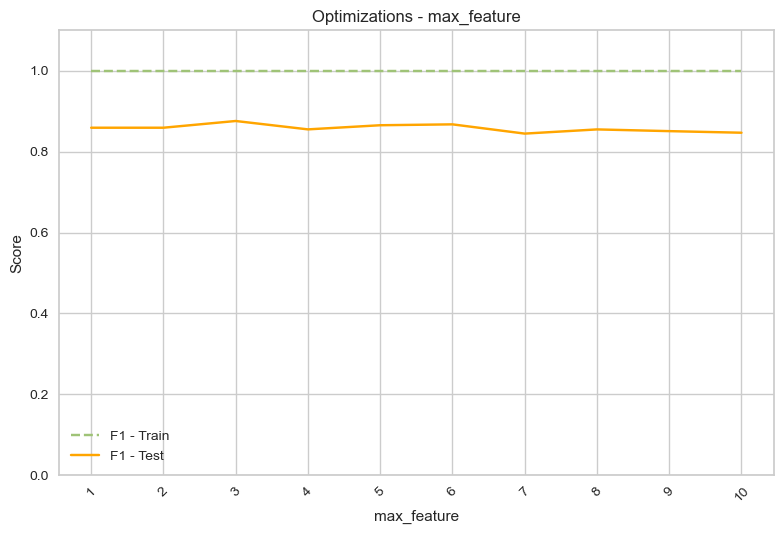

In [1717]:
line3, = plt.plot(max_features, train_results_f1, 'g--', label='F1 - Train')
line4, = plt.plot(max_features, test_results_f1, 'orange', label='F1 - Test')



plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})

x_ticks = list(range(1,X_train.shape[1]))
plt.xticks(x_ticks, rotation=45)
plt.ylim((0, 1.1))
plt.xlabel('max_feature')
plt.ylabel('Score')
plt.title('Optimizations - max_feature')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [1718]:
import time


start = time.time()

arvores = [50, 100, 200]  # Comece com um número maior de árvores
max_depths = [None, 3, 10, 20]  # Teste profundidade ilimitada e valores maiores
min_samples_leafs = [1, 2, 3, 4, 5]  # Evite valores muito baixos
min_samples_splits = [2, 5, 10]  # Valores maiores para evitar overfitting
train_results = []
test_results = []
parameters = pd.DataFrame(columns=["arvores", "max_depths", "min_samples_leafs", "min_samples_splits", "acc_train", "acc_test", "f1_train", "f1_test", 'recall_test', 'recall_train'])

for arvore in arvores:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for min_samples_split in min_samples_splits:
                print(arvore, "/", max_depth, "/", min_samples_leaf, "/", end=" ")

                rf = RandomForestClassifier(bootstrap=True,
                                            criterion='gini',
                                            max_depth=max_depth,
                                            max_features='sqrt',
                                            min_samples_leaf=min_samples_leaf,
                                            min_samples_split=min_samples_split,
                                            n_estimators=arvore,
                                            n_jobs=7,
                                            oob_score=True,
                                            random_state=42)
                rf.fit(X_train, y_train)

                train_pred = rf.predict(X_train)
                acc_train = metrics.accuracy_score(y_train, train_pred)
                f1_train = metrics.f1_score(y_train, train_pred, average='weighted')
                recall_train = metrics.recall_score(y_train, train_pred)
                train_results.append(acc_train)

                y_pred = rf.predict(X_test)
                acc_test = metrics.accuracy_score(y_test, y_pred)
                f1_test = metrics.f1_score(y_test, y_pred, average='weighted')
                recall_test = metrics.recall_score(y_test, y_pred)
                test_results.append(acc_test)

                new_row = pd.DataFrame([[arvore, max_depth, min_samples_leaf, min_samples_split, acc_train, acc_test, f1_train, f1_test, recall_test, recall_train]],
                                       columns=parameters.columns)
                parameters = pd.concat([parameters, new_row], ignore_index=True)

print("--- %s seconds ---" % (time.time() - start))


50 / None / 1 / 50 / None / 1 / 50 / None / 1 / 50 / None / 2 / 50 / None / 2 / 50 / None / 2 / 50 / None / 3 / 50 / None / 3 / 50 / None / 3 / 50 / None / 4 / 50 / None / 4 / 50 / None / 4 / 50 / None / 5 / 50 / None / 5 / 50 / None / 5 / 50 / 3 / 1 / 50 / 3 / 1 / 50 / 3 / 1 / 50 / 3 / 2 / 50 / 3 / 2 / 50 / 3 / 2 / 50 / 3 / 3 / 50 / 3 / 3 / 50 / 3 / 3 / 50 / 3 / 4 / 50 / 3 / 4 / 50 / 3 / 4 / 50 / 3 / 5 / 50 / 3 / 5 / 50 / 3 / 5 / 50 / 10 / 1 / 50 / 10 / 1 / 50 / 10 / 1 / 50 / 10 / 2 / 50 / 10 / 2 / 50 / 10 / 2 / 50 / 10 / 3 / 50 / 10 / 3 / 50 / 10 / 3 / 50 / 10 / 4 / 50 / 10 / 4 / 50 / 10 / 4 / 50 / 10 / 5 / 50 / 10 / 5 / 50 / 10 / 5 / 50 / 20 / 1 / 50 / 20 / 1 / 50 / 20 / 1 / 50 / 20 / 2 / 50 / 20 / 2 / 50 / 20 / 2 / 50 / 20 / 3 / 50 / 20 / 3 / 50 / 20 / 3 / 50 / 20 / 4 / 50 / 20 / 4 / 50 / 20 / 4 / 50 / 20 / 5 / 50 / 20 / 5 / 50 / 20 / 5 / 100 / None / 1 / 100 / None / 1 / 100 / None / 1 / 100 / None / 2 / 100 / None / 2 / 100 / None / 2 / 100 / None / 3 / 100 / None / 3 / 100 / Non

In [1719]:
parameters = parameters.set_index(pd.Series(range(0,parameters.shape[0])))

In [1720]:
parameters['acc_train'].max()

1.0

In [1721]:
parameters['acc_train'].sort_values()

89     0.84265
87     0.84265
83     0.84265
82     0.84265
81     0.84265
        ...   
60     1.00000
105    1.00000
120    1.00000
45     1.00000
0      1.00000
Name: acc_train, Length: 180, dtype: float64

In [1722]:
parameters

,arvores,max_depths,min_samples_leafs,min_samples_splits,acc_train,acc_test,f1_train,f1_test,recall_test,recall_train
0,50,None,1,2,1.000000,0.873967,1.000000,0.873848,0.840164,1.000000
1,50,None,1,5,0.979296,0.865702,0.979295,0.865576,0.831967,0.974895
2,50,None,1,10,0.939959,0.869835,0.939913,0.869770,0.844262,0.916318
3,50,None,2,2,0.973085,0.857438,0.973075,0.857367,0.831967,0.958159
4,50,None,2,5,0.964803,0.873967,0.964791,0.873775,0.831967,0.949791
...,...,...,...,...,...,...,...,...,...,...
175,200,20,4,5,0.913043,0.878099,0.912857,0.878059,0.856557,0.870293
176,200,20,4,10,0.915114,0.865702,0.914948,0.865677,0.848361,0.874477
177,200,20,5,2,0.906832,0.871901,0.906614,0.871883,0.856557,0.861925
178,200,20,5,5,0.906832,0.871901,0.906614,0.871883,0.856557,0.861925


In [1723]:
max_train_idx = parameters['acc_train'].idxmax(axis=0)
parameters.iloc[max_train_idx]

arvores                     50
max_depths                None
min_samples_leafs            1
min_samples_splits           2
acc_train                  1.0
acc_test              0.873967
f1_train                   1.0
f1_test               0.873848
recall_test           0.840164
recall_train               1.0
Name: 0, dtype: object

In [1724]:
max_test_idx = parameters['acc_test'].idxmax(axis=0)
parameters.iloc[max_test_idx]

arvores                    100
max_depths                None
min_samples_leafs            3
min_samples_splits           2
acc_train              0.94617
acc_test              0.880165
f1_train              0.946108
f1_test               0.880067
recall_test           0.848361
recall_train          0.916318
Name: 66, dtype: object

In [1725]:
max_test_f1_idx = parameters['f1_test'].idxmax(axis=0)
parameters.iloc[max_test_f1_idx]

arvores                    200
max_depths                  10
min_samples_leafs            2
min_samples_splits           5
acc_train             0.956522
acc_test              0.880165
f1_train              0.956489
f1_test               0.880094
recall_test           0.852459
recall_train          0.933054
Name: 154, dtype: object

In [1726]:
max_test_recall_idx = parameters['recall_test'].idxmax(axis=0)
parameters.iloc[max_test_recall_idx]

arvores                    100
max_depths                None
min_samples_leafs            5
min_samples_splits           2
acc_train             0.902692
acc_test              0.871901
f1_train              0.902463
f1_test               0.871883
recall_test           0.856557
recall_train          0.857741
Name: 72, dtype: object

In [1851]:
rf_opt = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=5, min_samples_split=2, random_state=42)
rf_opt.fit(X_train, y_train)

y_pred = rf_opt.predict(X_test)
pred_train = rf_opt.predict(X_train)

In [1853]:
base_cv = df.drop('Churn', axis=1).copy()
alvo_cv = df['Churn'].copy()

### Cross Validation

In [1856]:
# KFold Cross Validation
k = 10

cv=KFold(n_splits = k, shuffle = True)
cv.split(base_cv)

acc_cv = []

# Executando o CV
for train_index, test_index in cv.split(base_cv):
    # Split train-test
    X_train_, X_test_ = base_cv.iloc[train_index], base_cv.iloc[test_index]
    y_train_, y_test_ = alvo_cv.iloc[train_index], alvo_cv.iloc[test_index]
    # Train the model
    rf_cv = rf_opt.fit(X_train_, y_train_)
    # Append to accuracy_model the accuracy of the model
    acc_cv.append(round(metrics.accuracy_score(y_test_, rf_cv.predict(X_test_))*100,3))

print(acc_cv)

[85.567, 83.505, 88.66, 87.629, 86.598, 89.691, 87.629, 84.375, 88.542, 83.333]


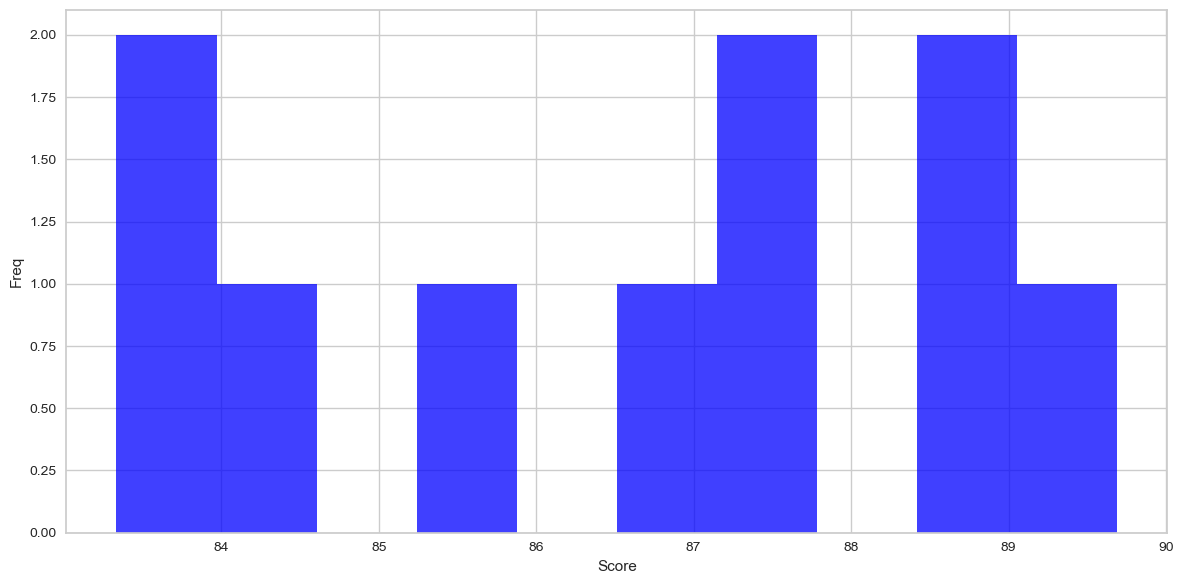

In [1857]:
plt.figure(figsize=(12,6))
plt.hist(acc_cv, facecolor='blue', alpha=0.75)
plt.xlabel('Score')
plt.ylabel('Freq')

plt.tight_layout()

plt.show()

In [1858]:
print("Acurácia Média:", np.mean(acc_cv))
print("Desvio Padrão:", np.std(acc_cv))


Acurácia Média: 86.5529
Desvio Padrão: 2.1432399515686544


## 5. Evaluation

**Objective**: Thoroughly evaluate the models to ensure they meet business objectives.

### Steps:
- **Evaluate Results**: Check if models achieve the data mining and business goals.
  - Example: Random Forest model achieves an F1-score of 0.85.
- **Review Process**: Review all steps in the CRISP-DM process to identify improvements or corrections needed.
  - Example: Check data preprocessing steps, model selection.
- **Determine Next Steps**: Decide whether to implement the project or if further iterations are needed.
  - Example: Plan for model deployment or additional tuning.


In [1860]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       240
           1       0.89      0.86      0.87       244

    accuracy                           0.87       484
   macro avg       0.87      0.87      0.87       484
weighted avg       0.87      0.87      0.87       484



In [1861]:
acc = accuracy_score(y_train, pred_train)
print('ACC - Train: ', round(acc, 4))

ACC - Train:  0.9027


In [1862]:
acc = accuracy_score(y_test, y_pred)
print('ACC - Test: ', round(acc, 4))

ACC - Test:  0.8719


* checking data dispersion

In [1864]:
df['Churn'].value_counts()

Churn
0    484
1    483
Name: count, dtype: int64

In [1865]:
f1_score(y_test, pred)
print(f'F1 Score: {f1}')

F1 Score: 0.8697674418604651


In [1866]:
precision = precision_score(y_test, pred)
print("Precision:", precision)

Precision: 0.9043478260869565


In [1867]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8801652892561983


In [1868]:
recall = recall_score(y_test, pred)
print("Recall:", recall)

Recall: 0.8524590163934426


In [1872]:
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[218  22]
 [ 36 208]]


0.9152892561983471

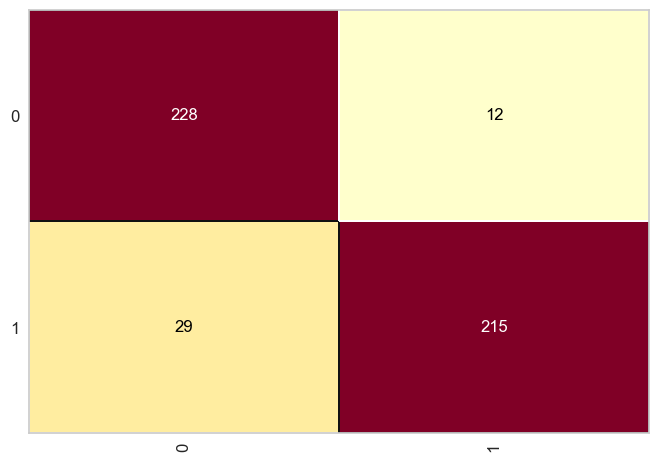

In [1881]:
cm = ConfusionMatrix(rf_opt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# Boostraping

In [1885]:
def boostraping_recall(x_train, y_train, R, model):
    vector = []
    n_iter = R
    for i in range(n_iter):
        x_bs, y_bs = resample(x_train, y_train)
        model.fit(x_bs, y_bs)
        y_pred_train = model.predict(x_train)
        recall_iter  = recall_score(y_train,y_pred_train)
        vector.append(recall_iter)
    return np.array(vector)



In [1887]:
x_all = original_df.drop(['Churn'], axis=1)
y_all = original_df['Churn']

In [1889]:
recall = boostraping_recall(x_all, y_all, R = 100, model = rf_opt)

In [1890]:
print('Recall mean', np.mean(recall))
print('Recall Std', recall.std())
print('Ratio:', (recall.std() / recall.mean()) * 100)

Recall mean 0.7294824016563148
Recall Std 0.016605071164972313
Ratio: 2.276281254663571


#### 6. Deployment
- **Deployment Plan**: Implement model in CRM system, schedule tasks.
- **Monitoring**: Set up regular performance tracking and model updates.
- **Final Report**: Document entire process and results.
- **Project Review**: Conduct a post-implementation review to gather feedback and lessons learned.


In [1751]:
#saved the model to disk
from pickle import dump

os.makedirs("pickle", exist_ok=True)

with open("pickle/model.pkl", "wb") as f:
    dump(rf, f, protocol=5)
    

In [1752]:
from pickle import load
with open("pickle/model.pkl", "rb") as f:
    model = load(f)

In [1753]:
print(f'Model atributtes:\n\nClass:{model.classes_}\nEstimators:{model.n_estimators}\nParams:{model.get_params}\n')

Model atributtes:

Class:[0 1]
Estimators:200
Params:<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=7, oob_score=True,
                       random_state=42)>



In [1754]:
X_train.head(1)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,FrequentCallerToSupport
628,97,1,0,0.0,1,112.7,119,38.0,10.89,6.5,0


In [1755]:
rf_opt.feature_importances_

array([0.00320807, 0.08375383, 0.08861679, 0.0588453 , 0.14968529,
       0.22083549, 0.00788995, 0.1550021 , 0.03856122, 0.02515382,
       0.16844813])

In [1756]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Peso':model.feature_importances_})

In [1757]:
feature_importance

,Feature,Peso
0,AccountWeeks,0.052420
1,ContractRenewal,0.101624
2,DataPlan,0.038959
3,DataUsage,0.071342
4,CustServCalls,0.101096
5,DayMins,0.204761
6,DayCalls,0.047477
7,MonthlyCharge,0.175160
8,OverageFee,0.068337
9,RoamMins,0.053567


<Axes: title={'center': 'Feature Importances'}, xlabel='Feature'>

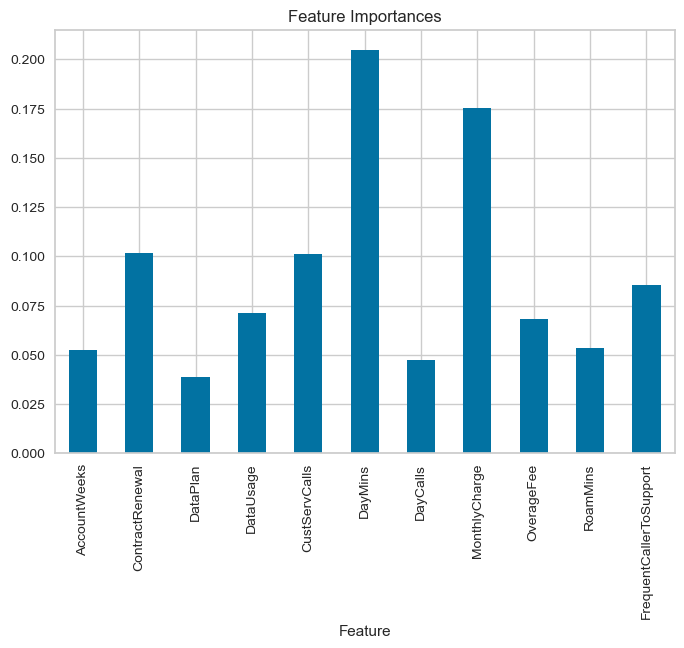

In [1758]:
feature_importance.plot(kind='bar', x='Feature', y='Peso', title='Feature Importances',legend=False)

# Telecommunications Company Churn Analysis Report

## Executive Summary:
This report presents the results of a churn analysis conducted for XYZ Telecommunications Company. The aim was to understand the factors influencing customer churn and propose strategies for reducing churn rates. Data from the company’s customer database was analyzed, focusing on demographic information, usage patterns, and service subscription details.

## Key Findings:

1. **Feature Importance:**
   - Analysis revealed that average daytime minutes per month (**DayMins**) had a strong positive correlation with churn probability. Customers with higher **DayMins** are more likely to churn.
   - The number of **CustServCalls** (customer service calls) also showed a significant relationship with churn. Customers who made more calls tend to be more dissatisfied with the service, increasing their likelihood of cancellation. This suggests that customer service is a critical factor in retention.
   - **MonthlyCharge**, or the monthly fee for the plan, was another important factor. Customers with higher monthly charges had a greater tendency to churn, possibly due to the perceived cost of the service compared to its value or satisfaction level.

2. **Segmentation Analysis:**
   - Customer segmentation based on **DayMins**, **CustServCalls**, and **MonthlyCharge** revealed distinct groups with varying churn rates. Customers with high **DayMins** and frequent **CustServCalls** exhibited the highest churn rates, indicating that these customers might be frustrated with the service but still utilize it extensively.
   - Customers with higher **MonthlyCharge** but few **CustServCalls** also showed a considerable churn probability, suggesting that these customers may not find enough value in the service to justify the cost.

3. **Retention Strategies:**
   - A promising approach to improving retention is the use of **personalized and segmented offers**. By analyzing customer behavior and identifying the primary reasons for cancellation, the company can apply automatic offers tailored to individual needs. 
   - For instance, customers with high **DayMins** and frequent **CustServCalls** could receive personalized support or discounts on service plans to address potential frustration. Similarly, customers with higher **MonthlyCharge** could be offered lower-cost plans or value-added services to reduce perceived costs and improve satisfaction.
   - Automating this process using predictive models can ensure that the right offers are delivered at the right time, based on customer profiles and churn predictions.

4. **Future Recommendations:**
   - Further analysis of customer satisfaction levels and engagement metrics is recommended to gain deeper insights into the underlying reasons for churn. Continuous monitoring of **CustServCalls** and **MonthlyCharge** is crucial for adjusting retention strategies.
   - A closer look at the relationship between service usage patterns and satisfaction levels will provide valuable insights into how to improve customer loyalty.
   - Implementing an automated system for personalized offers can help the company quickly adapt to customer needs and reduce churn over time.

## Conclusion:
The analysis identified **DayMins**, **CustServCalls**, and **MonthlyCharge** as significant predictors of churn at XYZ Telecommunications. By implementing targeted retention strategies, such as offering personalized incentives and adjusting pricing structures, the company can reduce churn rates and improve overall customer satisfaction and loyalty.
atisfaction and loyalty.
